In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diabetes=pd.read_csv("diabetess.csv")
diabetes

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


In [3]:
diabetes["Age"].isnull().sum()

8

In [4]:
diabetes["Age"]=diabetes["Age"].fillna(diabetes["Age"].mean())

In [5]:
diabetes["Age"]

0      55.0
1       8.0
2      26.0
3      40.0
4      45.0
       ... 
361    25.0
362    36.0
363    28.0
364    50.0
365    35.0
Name: Age, Length: 366, dtype: float64

In [6]:
diabetes.dtypes

erythema                                      int64
scaling                                       int64
definite borders                              int64
itching                                       int64
koebner phenomenon                            int64
polygonal papules                             int64
follicular papules                            int64
oral mucosal involvement                      int64
knee and elbow involvement                    int64
scalp involvement                             int64
family history                                int64
melanin incontinence                          int64
eosinophils in the infiltrate                 int64
PNL infiltrate                                int64
fibrosis of the papillary dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
clubbing of 

In [7]:
X=diabetes.drop(columns="class")
y=diabetes["class"]

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Model without PCA

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [23]:
classifier=RandomForestClassifier(random_state=10)
model_fit=classifier.fit(X_train,y_train)

In [24]:
y_test_pred=model_fit.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.83      0.83      0.83        12
           3       1.00      1.00      1.00        15
           4       0.89      0.80      0.84        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.95        74
   macro avg       0.95      0.94      0.94        74
weighted avg       0.95      0.95      0.95        74



### Model with PCA

In [25]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [26]:
pca=PCA()
pca_fit=pca.fit(X_train_scaled)

In [27]:
np.cumsum(pca_fit.explained_variance_ratio_)*100

array([ 27.13195406,  43.37896394,  52.28141138,  58.72724625,
        62.56755943,  66.16591203,  69.32538861,  72.13786734,
        74.75076827,  77.21426193,  79.63293075,  81.89933069,
        83.99666505,  86.04214271,  87.74892874,  89.29275413,
        90.77765672,  92.02164683,  93.12978276,  94.11238301,
        95.03444694,  95.80771388,  96.51160845,  97.20230619,
        97.81765061,  98.17621636,  98.51207648,  98.79784605,
        99.07107275,  99.32192322,  99.5642442 ,  99.73995711,
        99.89748578, 100.        ])

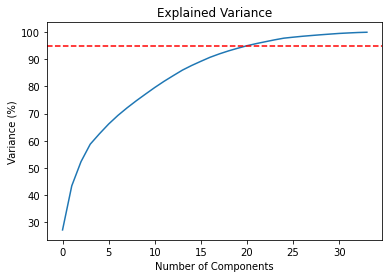

In [28]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 95% variance
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [29]:
X_train_scaled=pca.transform(X_train_scaled)
X_test_scaled=pca.transform(X_test_scaled)

In [30]:
X_train_scaled

array([[-3.05973946e+00, -1.56853742e+00, -1.34672792e-01, ...,
        -1.36685262e-01, -1.64714947e-02,  4.83105621e-02],
       [ 3.65600882e-01,  2.72741604e+00, -7.95923737e-01, ...,
        -3.24969394e-02, -6.64899918e-03,  5.45654546e-02],
       [-9.14682649e-01,  1.60019174e+00,  3.33790976e-01, ...,
        -5.29988522e-02,  7.59675994e-01, -7.36724557e-02],
       ...,
       [-4.33271287e+00, -2.73975816e+00, -3.04965612e-01, ...,
        -1.66666612e-01,  1.05800373e-01, -6.92344909e-02],
       [-3.16965619e+00, -1.92593547e+00, -3.09108068e-01, ...,
        -4.34521162e-03, -6.34241440e-02, -6.73253029e-02],
       [-2.46022743e-01,  4.05747722e+00,  5.91005809e+00, ...,
        -9.36097005e-02,  3.29751194e-01, -1.48408009e-02]])

In [32]:
X_train_scaled.shape

(292, 34)

In [33]:
X_train_scaled=X_train_scaled[:,:21]
X_test_scaled=X_test_scaled[:,:21]

In [34]:
classifier=RandomForestClassifier(random_state=10)
model_fit=classifier.fit(X_train_scaled,y_train)

In [35]:
y_test_pred=model_fit.predict(X_test_scaled)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        15
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74

